In [35]:
#part0 load data
import pandas as pd
from collections import Counter
import numpy as np
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

census_column_names=['age','workclass','fnlwgt','education','education-num',
                      'marital-status','occupation','relationship','race','sex',
                      'capital-gain','capital-loss','hours-per-week','native-country',
                      'annual-income']
CENSUS_FILE = './census_dataset.csv'
org_dataFile = pd.read_csv(CENSUS_FILE,names=census_column_names)
#number of features & type of features
org_dataFile.info()
#Classes
org_dataFile['annual-income'].value_counts()
org_dataFile['annual-income'].value_counts()/len(dataFile)
print("Not balanced")
#undersampling ??
#df2 = dataFile.copy()
le = preprocessing.LabelEncoder()
#preprocess string features        
def labelizedString(df2):
    for column_name in df2.columns:
        if df2[column_name].dtype == object:
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
dataFile = org_dataFile.copy()
labelizedString(dataFile)
#Standardize
ss = preprocessing.StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(dataFile),columns = dataFile.columns)
df_scaled.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27482 entries, 0 to 27481
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27482 non-null  int64 
 1   workclass       27482 non-null  object
 2   fnlwgt          27482 non-null  int64 
 3   education       27482 non-null  object
 4   education-num   27482 non-null  int64 
 5   marital-status  27482 non-null  object
 6   occupation      27482 non-null  object
 7   relationship    27482 non-null  object
 8   race            27482 non-null  object
 9   sex             27482 non-null  object
 10  capital-gain    27482 non-null  int64 
 11  capital-loss    27482 non-null  int64 
 12  hours-per-week  27482 non-null  int64 
 13  native-country  27482 non-null  object
 14  annual-income   27482 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.1+ MB


<=50K    19915
>50K      7567
Name: annual-income, dtype: int64

<=50K    0.724656
>50K     0.275344
Name: annual-income, dtype: float64

Not balanced


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,2.512876,2.623542,1.812241,0.182159,-0.447779,0.274676,1.765146,-0.236222,0.381518,-1.458621,-0.154589,-0.21747,-1.658226,-5.980612,-0.616413
1,0.526964,-0.223651,0.177394,-2.701686,-1.621369,-0.399612,-0.099018,2.282200,-2.030182,-1.458621,-0.154589,-0.21747,-0.853479,0.249546,-0.616413
2,1.188934,1.199946,1.246745,0.182159,-0.447779,-0.399612,-1.031100,-0.865828,0.381518,0.685579,-0.154589,-0.21747,-0.048732,0.249546,-0.616413
3,-0.061455,2.623542,1.683672,-0.604344,0.334614,0.948964,1.765146,1.022989,0.381518,0.685579,-0.154589,-0.21747,-2.060600,0.249546,-0.616413
4,-0.944083,1.199946,-1.492575,-0.604344,0.334614,-1.748187,0.134002,1.652594,0.381518,-1.458621,-0.154589,-0.21747,1.158388,0.249546,-0.616413


In [36]:
#part0(2)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer

def MySplit(n_splits,test_size,df):
  split = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=23721266)
  for train_index, test_valid_index in split.split(df, df['annual-income']):
     set1 = df.iloc[train_index]
     set2 = df.iloc[test_valid_index]
     return set1,set2

# stratified split 60%/20%/20% 
train_set,test_valid_set = MySplit(1,0.4,dataFile)
test_set,valid_set = MySplit(1,0.5,test_valid_set)
  
print(train_set['annual-income'].value_counts()/len(train_set))
print(test_set['annual-income'].value_counts()/len(test_set))

def myStd(df):
    ss = preprocessing.StandardScaler()
    df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
    return df_scaled 


train_set.head()
std_train_set = myStd(train_set)
std_test_set = myStd(test_set)
std_valid_set = myStd(valid_set)
std_train_set.head()

0    0.724665
1    0.275335
Name: annual-income, dtype: float64
0    0.724709
1    0.275291
Name: annual-income, dtype: float64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
5252,74,1,168782,5,4,6,7,1,4,0,0,0,35,37,0
23966,42,3,54102,15,10,0,0,4,4,0,0,0,40,37,0
12123,50,3,175045,11,12,2,9,0,4,1,0,0,41,37,1
13376,33,3,156464,11,9,0,2,1,4,1,0,0,40,37,0
13164,56,3,205735,3,2,5,6,4,4,1,0,0,40,37,0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,2.582376,-1.652415,-0.190218,-1.396191,-2.410379,2.287916,0.134561,-0.236923,0.379941,-1.472178,-0.155865,-0.21553,-0.440432,0.251142,-0.616399
1,0.233641,-0.229315,-1.291708,1.236797,-0.060311,-1.744304,-1.491600,1.659495,0.379941,-1.472178,-0.155865,-0.21553,-0.042333,0.251142,-0.616399
2,0.820825,-0.229315,-0.130063,0.183602,0.723045,-0.400230,0.599179,-0.869062,0.379941,0.679266,-0.155865,-0.21553,0.037287,0.251142,1.622325
3,-0.426940,-0.229315,-0.308531,0.183602,-0.451989,-1.744304,-1.026982,-0.236923,0.379941,0.679266,-0.155865,-0.21553,-0.042333,0.251142,-0.616399
4,1.261213,-0.229315,0.164712,-1.922789,-3.193735,1.615879,-0.097747,1.659495,0.379941,0.679266,-0.155865,-0.21553,-0.042333,0.251142,-0.616399


naive_bayes


0.7652374310146158

0.7581877729257642

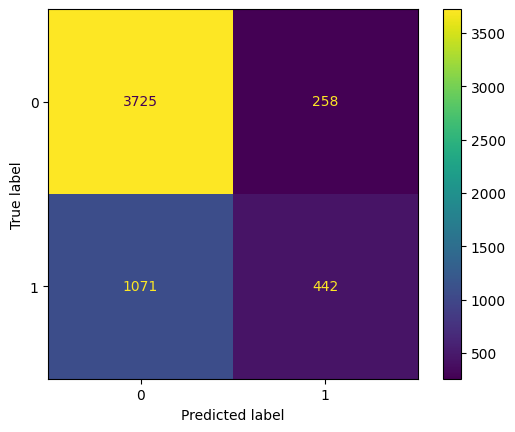

In [37]:
#part 1
#peformance metric functions
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import svm 

#separate features and labels
X_train = train_set.drop('annual-income',axis=1)
Y_train = train_set['annual-income']
X_test = test_set.drop('annual-income',axis=1)
Y_test = test_set['annual-income']


#naive_bayes model 
print("naive_bayes")
gnb = GaussianNB()
Y_pred_train = gnb.fit(X_train,Y_train).predict(X_train)
accuracy_score(Y_train,Y_pred_train)

Y_pred_test = gnb.predict(X_test)
accuracy_score(Y_test,Y_pred_test)

gnb_cm = confusion_matrix(Y_test,Y_pred_test)
disp=ConfusionMatrixDisplay(confusion_matrix=gnb_cm,
                            display_labels=gnb.classes_)
disp.plot()
plt.show()



Random Forest:


0.7652374310146158

0.8538937409024745

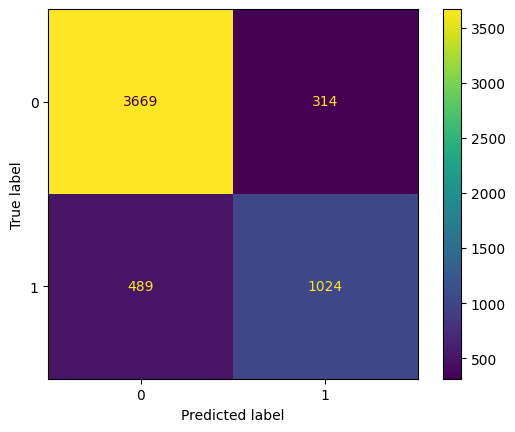

In [39]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
print("Random Forest:")
rf = RandomForestClassifier()
rf_Y_pred_train = rf.fit(X_train,Y_train).predict(X_train)
accuracy_score(Y_train,Y_pred_train)

rf_Y_pred_test = rf.predict(X_test)
accuracy_score(Y_test,rf_Y_pred_test)

rf_cm = confusion_matrix(Y_test,rf_Y_pred_test)
rf_disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                            display_labels=rf.classes_)
rf_disp.plot()
plt.show()

SVM:


SVC()

0.8535387227848868

0.8402474526928675

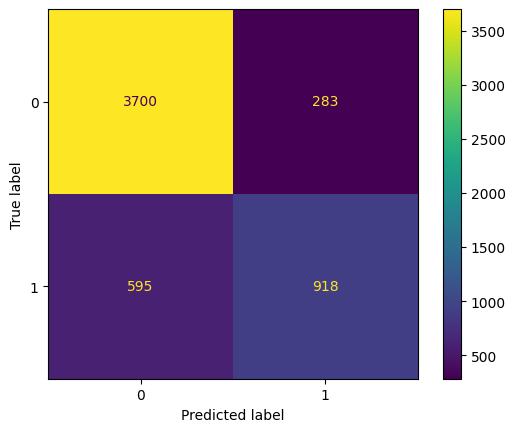

In [40]:
#Support Vector Machine (SVM)
print("SVM:")
std_X_train = std_train_set.drop('annual-income',axis=1)
std_Y_train = train_set['annual-income']
std_X_test = std_test_set.drop('annual-income',axis=1)
std_Y_test = test_set['annual-income']

svc_model = svm.SVC()
svc_model.fit(std_X_train,std_Y_train)
svc_Y_pred_train = svc_model.predict(std_X_train)
accuracy_score(std_Y_train,svc_Y_pred_train)

svc_Y_pred_test = svc_model.predict(std_X_test)
accuracy_score(std_Y_test,svc_Y_pred_test)

svc_cm = confusion_matrix(std_Y_test,svc_Y_pred_test)
svc_disp =ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                            display_labels=svc_model.classes_)
svc_disp.plot()
plt.show()


In [41]:
#part1 (2)

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['auc','f1','accuracy','sensitivity','specificity', 'precision']

def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    if include_cm:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}
    
NBperformance = p1_metrics(Y_test,Y_pred_test)
RFperformance = p1_metrics(Y_test,rf_Y_pred_test)
SVMperformance = p1_metrics(Y_test,svc_Y_pred_test)

In [ ]:
#part 1(3) 
